In [1]:
import dicom
import numpy as np
import os
from PIL import Image
import shutil
import scipy.misc

/work/dependence/anaconda3/envs/py36/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


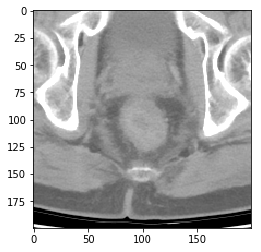

In [106]:
plt.imshow(convertImg[200:400,150:350], 'gray')

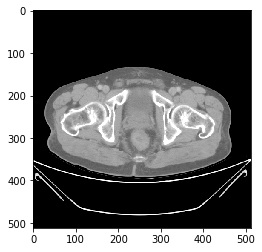

In [42]:
plt.imshow(convertImg, 'gray')

In [2]:
Paths = './B题示例数据/CT影像/'
list_Paths = os.listdir(Paths)
#dcm = dicom.read_file(Paths+i+'/'+j+'/'+m[:-9]+'.dcm')

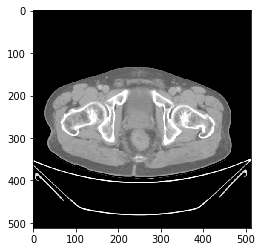

In [30]:
from matplotlib import pyplot as plt
plt.imshow(imgRevert)

In [15]:
from PIL import Image
import numpy as np
tmp_con = Image.open('/home/kb/Python_test/Taidi/Image_Segmentation-master/ISIC/dataset/cancer/B题-全部数据/数据集1/1001/arterial phase/10007_mask.png')
tmp_conar = np.array(tmp_con)
#tmp_conar = tmp_conar[200:400,150:350]
#plt.imshow(tmp_conar, 'gray')

In [16]:
loc = (170, 490, 100, 420)
SR = tmp_conar[loc[0]:loc[1],loc[2]:loc[3]]
tmp_SR = np.zeros(shape=(512,512))
#tmp_gt_masks[loc[0]:loc[1],loc[2]:loc[3]] = gt_masks
tmp_SR[loc[0]:loc[1],loc[2]:loc[3]] = SR

In [18]:
512*512

262144

In [17]:
np.sum(tmp_conar==tmp_SR)

262144

In [107]:
dataset_mask

'./ISIC/dataset/cancer/Mask/'

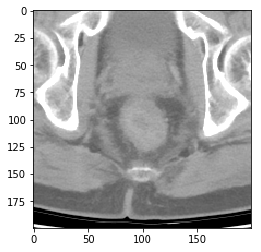

In [88]:
plt.imshow(convertImg[200:400,150:350], 'gray')

In [73]:
tmp_im = Image.open('./B题示例数据/CT影像/1034/venous phase/20081_mask.png')

In [ ]:
tmp_zeros = np.zeros(shape=(512,512))

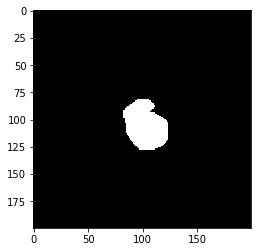

In [82]:
tmp_imar2 = np.array(tmp_im)
#tmp_imar.setflags(write=1)
tmp_imar1 = tmp_imar2[200:400,150:350]
plt.imshow(tmp_imar1, 'gray')

In [81]:
tmp_imar[200:400, 150:350] = tmp_imar1

In [117]:
dcm.image.shape

(512, 512)

In [85]:
512*512

262144

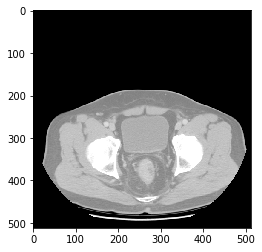

In [14]:
import matplotlib.pyplot as plt
plt.imshow(convertImage(dcm.image), 'gray')

In [9]:
for i in list_Paths:
    list_PathClasses = os.listdir(Paths+i+'/')
    for j in list_PathClasses:
        list_Dcmfiles = os.listdir(Paths+i+'/'+j+'/')
        for m in list_Dcmfiles:
            if '_mask' in m:
                tmp_img = Image.open(Paths+i+'/'+j+'/'+m)
                tmp_img = np.asarray(tmp_img)
                if np.max(tmp_img)>0:
                    dcm = dicom.read_file(Paths+i+'/'+j+'/'+m[:-9]+'.dcm')
    #                 dcm = dicom.read_file(Dcmfile)
                    dcm.image = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
                    convertImg = convertImage(dcm.image)
                    imgRevert = np.repeat(np.expand_dims(convertImg, axis=2), 3, axis=2)
#                     im = Image.fromarray(np.uint8(imgRevert))
#                     im.save(dataset+m[:-9]+'.png')
                    scipy.misc.imsave(dataset+m[:-9]+'.png', imgRevert)
                    shutil.copy(Paths+i+'/'+j+'/'+m, dataset_mask)
                    print(dataset+m[:-9]+'.png')

/work/dependence/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


./ISIC/dataset/cancer/Input/10076.png
./ISIC/dataset/cancer/Input/10077.png
./ISIC/dataset/cancer/Input/10078.png
./ISIC/dataset/cancer/Input/10079.png
./ISIC/dataset/cancer/Input/10080.png
./ISIC/dataset/cancer/Input/10081.png
./ISIC/dataset/cancer/Input/20076.png
./ISIC/dataset/cancer/Input/20077.png
./ISIC/dataset/cancer/Input/20078.png
./ISIC/dataset/cancer/Input/20079.png
./ISIC/dataset/cancer/Input/20080.png
./ISIC/dataset/cancer/Input/20081.png
./ISIC/dataset/cancer/Input/10068.png
./ISIC/dataset/cancer/Input/10069.png
./ISIC/dataset/cancer/Input/10070.png
./ISIC/dataset/cancer/Input/10071.png
./ISIC/dataset/cancer/Input/10072.png
./ISIC/dataset/cancer/Input/10073.png
./ISIC/dataset/cancer/Input/10158.png
./ISIC/dataset/cancer/Input/10159.png
./ISIC/dataset/cancer/Input/10160.png
./ISIC/dataset/cancer/Input/10161.png
./ISIC/dataset/cancer/Input/10162.png
./ISIC/dataset/cancer/Input/10163.png
./ISIC/dataset/cancer/Input/10078.png
./ISIC/dataset/cancer/Input/10079.png
./ISIC/datas

KeyboardInterrupt: 

In [ ]:
import cv2
cv2.imread(dataset+m[:-9]+'.png', imgRevert)

In [50]:
Paths+i+'/'+j+'/'+m

'./B题示例数据/CT影像/1034/venous phase/20088_mask.png'

In [8]:
Paths = './B题示例数据/CT影像/'
list_Paths = os.listdir(Paths)
dataset = './ISIC/dataset/cancer/Input/'
dataset_mask = './ISIC/dataset/cancer/Mask/'

In [4]:
def convertImage(raw):
    img = np.array(raw)
    img[img>255] = 255
    mean = np.mean(img)
    img = img - mean
    img = img*1.5 + mean*0.7#修对比度和亮度
    img = img/np.max(img)
    img[img<0] = 0
    return img
def rm_mkdir(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
        print('Remove path - %s'%dir_path)
    os.makedirs(dir_path)
    print('Create path - %s'%dir_path)

def removeImage(dataset, dataset_mask):
    tictoc = 0
    rm_mkdir(dataset)
    rm_mkdir(dataset_mask)
    for i in list_Paths:
        list_PathClasses = os.listdir(Paths+i+'/')
        for j in list_PathClasses:
            list_Dcmfiles = os.listdir(Paths+i+'/'+j+'/')
            for m in list_Dcmfiles:
                tictoc+=1
                if '_mask' in m:
                    tmp_img = Image.open(Paths+i+'/'+j+'/'+m)
                    tmp_img = np.asarray(tmp_img)
                    if np.max(tmp_img)>0:
                        dcm = dicom.read_file(Paths+i+'/'+j+'/'+m[:-9]+'.dcm')
        #                 dcm = dicom.read_file(Dcmfile)
                        dcm.image = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
                        convertImg = convertImage(dcm.image)
                        imgRevert = np.repeat(np.expand_dims(convertImg, axis=2), 3, axis=2)
    #                     im = Image.fromarray(np.uint8(imgRevert))
    #                     im.save(dataset+m[:-9]+'.png')
                        scipy.misc.imsave(dataset+m[:-9]+'.png', imgRevert)
                        shutil.copy(Paths+i+'/'+j+'/'+m, dataset_mask)
                if tictoc%100==0:
                    print('tmp_path is {}, number is {}'.format(dataset+m[:-9]+'.png', tictoc))
#                     elif '_mask' in m:
#                         tmp_img = Image.open(Paths+i+'/'+j+'/'+m)
#                         tmp_img = np.asarray(tmp_img)
#                         if np.max(tmp_img)>0:
#                         shutil.copy(Paths+i+'/'+j+'/'+m, dataset_mask)
                #! cp Paths+i+'/'+j+'/'+m dataset_mask
                #print(Paths+i+'/'+j+'/'+m, dataset_mask)
removeImage(Dataset, Dataset_mask)

NameError: name 'Dataset' is not defined

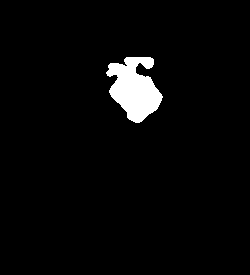

In [119]:
sample_path = './sample/1096_a_10018_mask.png'
Image.open(sample_path)

In [ ]:
import cv2  
import numpy as np  
import math  

def stretchImage(data, s=0.005, bins = 2000):    #线性拉伸，去掉最大最小0.5%的像素值，然后线性拉伸至[0,1]  
    ht = np.histogram(data, bins);  
    d = np.cumsum(ht[0])/float(data.size)  
    lmin = 0; lmax=bins-1  
    while lmin<bins:  
        if d[lmin]>=s:  
            break  
        lmin+=1  
    while lmax>=0:  
        if d[lmax]<=1-s:  
            break  
        lmax-=1  
    return np.clip((data-ht[1][lmin])/(ht[1][lmax]-ht[1][lmin]), 0,1)  

g_para = {}  
def getPara(radius = 5):                      #根据半径计算权重参数矩阵  
    global g_para  
    m = g_para.get(radius, None)  
    if m is not None:  
        return m  
    size = radius*2+1  
    m = np.zeros((size, size))  
    for h in range(-radius, radius+1):  
        for w in range(-radius, radius+1):  
            if h==0 and w==0:  
                continue  
            m[radius+h, radius+w] = 1.0/math.sqrt(h**2+w**2)  
    m /= m.sum()  
    g_para[radius] = m  
    return m  

def zmIce(I, ratio=4, radius=300):                     #常规的ACE实现  
    para = getPara(radius)  
    height,width = I.shape  
    zh,zw = [0]*radius + range(height) + [height-1]*radius, [0]*radius + range(width)  + [width -1]*radius  
    Z = I[np.ix_(zh, zw)]  
    res = np.zeros(I.shape)  
    for h in range(radius*2+1):  
        for w in range(radius*2+1):  
            if para[h][w] == 0:  
                continue  
            res += (para[h][w] * np.clip((I-Z[h:h+height, w:w+width])*ratio, -1, 1))  
    return res  